# **IT5005 Project Milestone 1 : Object Detection and Tracking in Video with pretrained model**

Please write your names and student IDs. Briefly highlight the contribution of each team member.

| Name | Student ID |
|----------|----------|
| LIU Yichao | A0304386A |
| #YOUR ANSWER GOES HERE | #YOUR ANSWER GOES HERE |
| #YOUR ANSWER GOES HERE | #YOUR ANSWER GOES HERE |
| #YOUR ANSWER GOES HERE | #YOUR ANSWER GOES HERE |
| #YOUR ANSWER GOES HERE | #YOUR ANSWER GOES HERE |


For now, let's start the Milestone 1...


<u>**Objectives**:</u>

The key objectives of this milestone are:

1. Use pre-trained model to detect and track object in video and understand the difference between object detection and tracking task.
2. Understand hyperparameter tuning in object detection and tracking model.
3. Learn basic application of object tracking in video.

<u>**Instruction**:</u>

The use case is pedestrian detection and their motion tracking over video frames. For this milestone, students are not required to have in-depth understanding about machine learning and deep neural network.
You would work with Ultralytics library in Google Colab that is mounted to your Google drive.

There are several questions in this task and you are recommended to write the code, run your code, and answer the questions subsequently.

When you see these comments, please follow the instruction as follows:


```
# DO NOT EDIT THIS CELL
    - The code below this comment is fixed and you are not supposed to modify it.    
```



```
'''
Question
'''
    - You should read the question carefully.
```



```
#YOUR ANSWER GOES HERE

    - Use the space below this comment to answer the questions.  
    
```





Furthermore, please take note of the symbols and their meaning.

| <font size=3>Legend<font> | <font size=3>Description<font> |
|----------|----------|
| <font size=4> **`▶  General Information`** <font>| <font size=3>Basic concepts or special terminologies<font> |
| <font size=4>**`⭕ Help`**<font> | <font size=3>Hints for solutions<font> |
| <font size=4>**`🔎 Reference`**<font> | <font size=3>Additional resources.<font> |
| <font size=4>**`⛳ Caution`**<font> | <font size=3> Pay attention to the detail.


<u>**Submission**:</u>

After completing this notebook, only one representative of your group has to submit the following milestone deliverables in Canvas:

1. This google colab file (.ipynb) and

2. Accessible link to your project folder in Google drive. You are supposed to collect all the files in working environment (/content/drive/MyDrive/IT5005_Project_1)

Please be reminded to collect all the related files in the working environment and grant the permission of the project folder publicly (Right-click the folder to “Share” >>  Under General Access, choose “Anyone with the link”)  

Let's get started...

### **Step1) Mount your Google Drive to use as working directory for Google Colab**

In [ ]:
# DO NOT EDIT THIS CELL
from google.colab import drive
drive.mount('/content/drive') # Mount Google Drive
target_directory = '/content/drive/MyDrive/IT5005_Project_1' # Define the target directory inside Google Drive
!mkdir $target_directory # Create working directory inside Google Drive

### **Step2) Download input video file**

**`⛳ Caution`** :

Don't forget to check whether input video file exists in google colab folder
1. Click "Folder" icon on the left tab bar
2. Check path "drive >> MyDrive >> IT5005_Project_1"

In [ ]:
# DO NOT EDIT THIS CELL
!pip install gdown
!gdown 'https://drive.google.com/uc?id=1ceQOOg1g5Fyy3iaWQVgzXJ5HfYz2yO07' #Download raw video file for detection and tracking inference
!mv '/content/MOT17-03-SDP.mp4' $target_directory/MOT17-03-SDP.mp4 #Move downloaded video file to the working directory


In [ ]:
!rm -rf '/content/MOT17-03-SDP.mp4'

### **Step3) Install Ultralytics library**

**`⭕ Help`** : Using !pip install is the easiest way to access the latest development version of Ultralytics library

**`🔎 Reference`** : https://docs.ultralytics.com/quickstart/#install-ultralytics

**`⛳ Caution`** : Don't forget '!' before pip









In [ ]:
'''
Install Ultralytics library
'''

#YOUR ANSWER GOES HERE
!pip install ultralytics

### **Step4) Check ultralytics version and GPU setup**

**`⭕ Help`** : Ultralytics version must be at least 8.3.68, Torch==2.5.1+cu121, and runtime type==CUDA (GPU)

**`🔎 Reference`** : https://docs.ultralytics.com/integrations/google-colab/#key-features-of-google-colab

**`⛳ Caution`** : Make sure that you change runtime to use T4 GPU before running this cell


In [ ]:
# DO NOT EDIT THIS CELL
import ultralytics
ultralytics.checks()

### **Step5) Import YOLO model and other packages**

**`▶ General Information`** : Ultralytics offers support for a wide range of
models, each tailored to specific tasks like object detection, instance segmentation, image classification, pose estimation, and multi-object tracking

In this project, you will learn how to use YOLO11, which is the latest model, for object detection and tracking task from Ultralytics library.

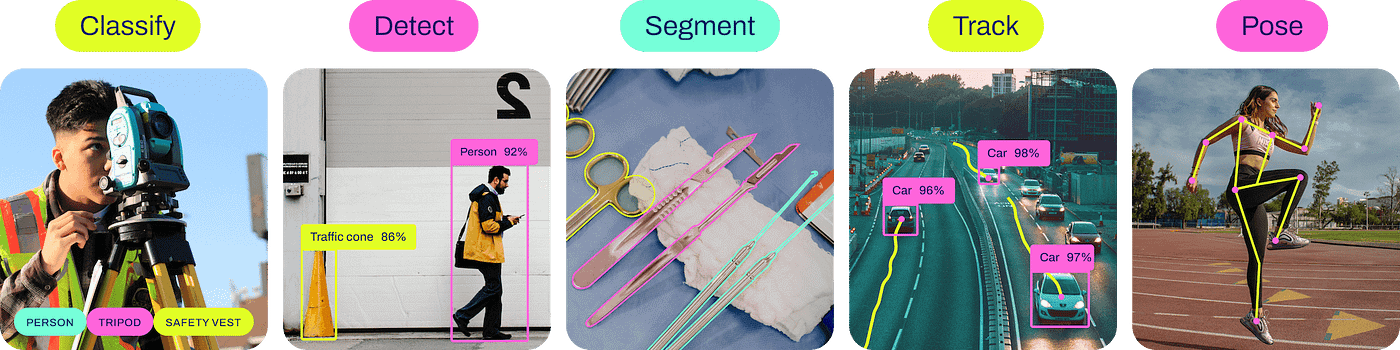

**`🔎 Reference`** : https://docs.ultralytics.com/models/

In [ ]:
'''
Import "YOLO package" from Ultralytics library
'''

#YOUR ANSWER GOES HERE
from ultralytics import YOLO


In [ ]:
# DO NOT EDIT THIS CELL
from IPython.display import Image #Import Image package from IPython.display. This package is used to display image output

### **Step6) Understand YOLO11 pre-trained model and its original training dataset for object detection**

**`▶ General Information`** : Due to YOLO pre-trained model, we don't need to collect our dataset train model by yourselves. You can use it for predicting (or inferencing) object detection in video immidiately. By the way, the dataset used for training YOLO model is interesting.

**`🔎 Reference`** : https://docs.ultralytics.com/datasets/detect/coco/

In [ ]:
'''
What is pre-trained model in general?

A pre-trained model is a machine learning model that has been previously trained on a large dataset and saved, so it can be used as a starting point for a new model on a similar task. This approach leverages the patterns and knowledge the model has already learned, which can significantly reduce the time and computational resources required to train a new model. Pre-trained models are commonly used in tasks such as image classification, object detection, natural language processing, and more.

'''

In [ ]:
'''
What dataset is initially used to train yolo model for object detection (i.e. yolo11n.pt)?

The YOLO model (including yolo11n.pt) is initially trained on the COCO (Common Objects in Context) dataset. The COCO dataset is a large-scale object detection, segmentation, and captioning dataset that contains over 200,000 labeled images with 80 object categories.

'''

In [ ]:
'''
From initial training dataset, how many classes/categories of object can be detected by yolo11n.pt?

80.

'''

In [ ]:
'''
What are the class indices of "person" and "car" in YOLO initial training dataset?

person - 0
car - 2

'''

### **Step7) Load pre-trained object detection model : 5 variants of YOLO11 (You Look Only Once)**

**`▶ General Information`** : 5 variants of YOLO11 pre-trained model for object detection task:
- yolo11n.pt
- yolo11s.pt
- yolo11m.pt
- yolo11l.pt
- yolo11x.pt

In this project, you would download the smallest model (yolo11n.pt) for getting started


**`⭕ Help`** :
1. Use YOLO( ) to download (instantiate) model
2. After downloading YOLO model successfully, run next cell to move model file to working environment

**`🔎 Reference`** : https://docs.ultralytics.com/models/yolo11/#supported-tasks-and-modes

In [ ]:
'''
Load the smallest model of YOLO11 (yolo11n.pt model)
'''

model = YOLO('yolo11n.pt')



In [ ]:
# DO NOT EDIT THIS CELL

!mv /content/yolo11n.pt $target_directory/yolo11n.pt #Move model file to working environment
!rm -rf /content/yolo11n.pt

### **Step8) Predict bounding boxes and object class**

**`⭕ Help`** :
1. Use predict( ) function to detect objects in video
2. In predict function, there are 3 arguments:


*   <u>source</u> : path where to get video file
*   <u>save</u> : whether you will save object detection result after running predict( ).
*   <u>project</u> : directory where to save object detection results

**`🔎 Reference`** : https://docs.ultralytics.com/modes/predict/#inference-arguments

**`⛳ Caution`** :
1. Make sure that you type the video input path as value of "source" argument correctly.
2. Don't forget to save video output to display your prediction results by setting a correct value of "save" argument.
3. Make sure that you put the right directory path to keep output video file (object detection result) in "project" argument.
4. Check path of output video carefully. It is stated in code cell output after running predict( ).


In [ ]:
'''
Question
Run prediction on a downloaded video (MOT17-03-SDP.mp4))

'''

#YOUR ANSWER GOES HERE




# Interpret the results by extracting the details from prediction output

Your Answer

In [ ]:
#YOUR ANSWER GOES HERE


### **Step9) Display detection output in video**

**`⭕ Help`** : The code below is pre-defined to compress and display video output in Google Colab. Your task is only to update the directory of output video and press "Run cell" buttons at the next 2 code blocks without any other modification.

**`⛳ Caution`** :
1. Make sure that you assign "save_folder_path" variable with the right directory where output video file exists.

In [ ]:
'''
Question
Update output video folder directory generated from previous step
Store the prediction results in a separate folder within the IT5005_Project_1 directory
You can name it predict, for example.
'''
 #YOUR ANSWER IS HERE
save_folder_path =

In [ ]:
# DO NOT EDIT THIS CELL

from IPython.display import HTML
from base64 import b64encode
import os

save_path = save_folder_path + '/MOT17-03-SDP.avi' # Input video path
compressed_path = save_folder_path + '/result_compressed.mp4' # Compressed video path

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

mp4 = open(compressed_path,'rb').read() # Show video
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
'''
Question
Summarize your observations from the above prediction.

#YOUR ANSWER GOES HERE


'''

### **Step10) Experiment with other arguments (Confidence score, Maximum detection, Class filter)**

**`⭕ Help`** :
1. Use predict( ).
2. Add more arguments into predict( )
*   <u>conf</u> : Minimum confidence threshold for detections. The value must be in between 0.00 and 1.00
*   <u>max_det</u> : Maximum number of detections allowed per image. The value must be positive integer.
*   <u>classes</u> : Filters predictions to a set of class IDs. The value must be list of class IDs (i.e [0,1,2] or [34,45] or etc.)
3. For class IDs, you can refer the class IDs from reference link below
4. See results by running cell in the next step.

**`🔎 Reference`** :

1) https://docs.ultralytics.com/modes/predict/#inference-arguments
2) https://docs.ultralytics.com/datasets/detect/coco/

**`⛳ Caution`** :
1. Make sure that you type the video input path as value of "source" argument correctly.
2. Don't forget to save video output to display your prediction results by setting a correct value of "save" argument.
3. Make sure that you put the right directory path to keep output video file (object detection result) in "project" argument.
4. Check path of output video carefully. It is stated in code cell output after running predict( ).
5. The values of "conf" , "max_det", and "classes" must be correct datatypes.


In [ ]:
'''
Question
Experiment with arguments of predict function
1. Confidence score,
2. Maximum detection,
3. Class filter
'''

#YOUR ANSWER GOES HERE


### **Step11) Display detection output in video**

**`⭕ Help`** :The code below is pre-defined to compress and display video output in Google Colab. Your task is only to update the directory of output video and press "Run cell" buttons at the next 2 code blocks without any other modification.

**`⛳ Caution`** :
1. Make sure that you assign "save_folder_path" variable with the right working directory where output video file exists.

In [ ]:
'''
Question
Update output video folder directory generated from previous step
'''
#YOUR ANSWER GOES HERE
save_folder_path =

In [ ]:
# DO NOT EDIT THIS CELL

from IPython.display import HTML
from base64 import b64encode
import os

save_path = save_folder_path + '/MOT17-03-SDP.avi' # Input video path
compressed_path = save_folder_path + '/result_compressed.mp4' # Compressed video path

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

mp4 = open(compressed_path,'rb').read() # Show video
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
'''
Question
Summarize your observations from the above experiment in the table below
'''

| Hyperparmeter | Definition | Possible value | What happen when you change value |
|----------|----------|----------|----------|
| conf | Confidence score | 0.0-1.0 |#YOUR ANSWER GOES HERE|
| max_det | Maximum detection | Positive integer |#YOUR ANSWER GOES HERE|
| classes | Classes | list[int] |#YOUR ANSWER GOES HERE|


### **Step12) Extend Object Detection to Object Tracking with ByteTrack Algorithm & Experiment with arguments (Confidence score, Maximum detection, Class filter)**

**`▶ General Information`** : Ultralytics YOLO supports the 2 tracking algorithms. In this project, we will use ByteTrack as tracking algorithm.

**`⭕ Help`** :
1. Use track( ) function to track unique object in video
2. In track function, there are 7 arguments:


*   <u>source</u> : path where to get video file
*   <u>save</u> : whether you will save object detection result after running predict( ).
*   <u>project</u> : directory where to save object detection result
*   <u>tracker</u> : tracker algorithm options. For Ultralytics library, there are BoT-SORT or ByteTrack. In this project, you have to use ByteTrack algorithm
*   <u>conf</u> : Minimum confidence threshold for detections. The value must be in between 0.00 and 1.00
*   <u>max_det</u> : Maximum number of detections allowed per image. The value must be positive integer.
*   <u>classes</u> : Filters predictions to a set of class IDs. The value must be list of class IDs (i.e [0,1,2] or [34,45] or etc.)

**`🔎 Reference`** : https://docs.ultralytics.com/modes/track/#available-trackers

**`⛳ Caution`** :
1. Make sure that you type the video input path as value of "source" argument correctly.
2. Don't forget to save video output to display your tracking result by correct value of "save" argument.
3. Make sure that you put the right directory path to keep output video file (object tracking result) in "project" argument.
4. Check path of output video carefully. It is stated in code cell output after running track( ).
5. The value of "tracker" argument must refer to use "ByteTrack" algorithm.
6. The values of "conf" , "max_det", and "classes" must be correct datatypes.

In [ ]:
'''
Question
Run tracking prediction on a downloaded video (MOT17-03-SDP.mp4)
'''
#YOUR ANSWER GOES HERE
results =   # Perform tracking model with the ByteTrack algorithm

### **Step13) Display tracking output in video**

**`⭕ Help`** : The code below is pre-defined to compress and display video output in Google Colab. Your task is only to update the directory of output video and press "Run cell" buttons at the next 2 code blocks without any other modification.

**`⛳ Caution`** :
1. Make sure that you assign "save_folder_path" variable with the right working directory where output video file exists.

In [ ]:
'''
Update output video folder directory generated from previous step
'''
#YOUR ANSWER GOES HERE

save_folder_path =

In [ ]:
# DO NOT EDIT THIS CELL
from IPython.display import HTML
from base64 import b64encode
import os

save_path = save_folder_path + '/MOT17-03-SDP.avi' # Input video path
compressed_path = save_folder_path + '/result_compressed.mp4' # Compressed video path

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

mp4 = open(compressed_path,'rb').read() # Show video
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
'''
Summarize your observations from the above experiment. Highlight the difference between object detection and tracking.


#YOUR ANSWER GOES HERE

'''

'\nSummarize your observations from the above experiment. Highlight the difference between object detection and tracking.\n\n\n#YOUR ANSWER GOES HERE\n\n'

### **Step14) Use-case of object tracking: Plotting Tracks Over Time**

**`⭕ Help`** : Just run cells, analyze the output, and share observations below.

**`🔎 Reference`** : https://docs.ultralytics.com/modes/track/#plotting-tracks-over-time

In [ ]:
# DO NOT EDIT THIS CELL

import cv2
import numpy as np
from collections import defaultdict


model = YOLO("yolo11n.pt")

## Open video reader and capture the video frames
video_path = '/content/drive/MyDrive/IT5005_Project_1/MOT17-03-SDP.mp4'
cap = cv2.VideoCapture(video_path)

## Set empty track history and start from first video frame
track_history = defaultdict(lambda: [])
first_frame = True

## Loop through the video frames
while cap.isOpened():
    ## Read a frame from the video
    success, frame = cap.read()

    if first_frame == True:
        ## Initialize video writer
        if not os.path.exists(target_directory+'/trail'):
            ## Create working directory inside Google Drive
            !mkdir $target_directory/trail
        output_file = '/content/drive/MyDrive/IT5005_Project_1/trail/output_video.avi'
        height, width, layers = frame.shape
        fourcc = cv2.VideoWriter_fourcc(*'XVID')  ## Codec: XVID for .avi files
        fps = 30  ## Frames per second
        out = cv2.VideoWriter(output_file, fourcc, fps, (width, height))
        first_frame = False

    ##Iterate until last video frame
    if success:

        ## Run ByteTrack tracking on the frame, persisting tracks between frames
        results = model.track(frame,
                              persist=True,
                              verbose=False,
                              tracker="bytetrack.yaml",
                              conf=0.25,
                              max_det=10,
                              classes = [0])

        ## Get the boxes and track IDs
        boxes = results[0].boxes.xywh.cpu()
        track_ids = results[0].boxes.id.int().cpu().tolist()

        ## Visualize the tracking results on the frame
        annotated_frame = results[0].plot()

        ## Collect tracking data
        for box, track_id in zip(boxes, track_ids):
            x, y, w, h = box
            track = track_history[track_id]
            track.append((float(x), float(y)))  ## x, y center point
            if len(track) > 90:  ## retain 90 tracks for 90 frames
                track.pop(0)

            ## Draw the tracking lines
            points = np.hstack(track).astype(np.int32).reshape((-1, 1, 2))
            cv2.polylines(annotated_frame, [points], isClosed=False, color=(0, 0, 230), thickness=7)

        ## Write annotated frame to video
        out.write(annotated_frame)

    else:
        ## Break the loop if the end of the video is reached
        break



## Release the video reader and writer and close the display window
cap.release()
out.release()
cv2.destroyAllWindows()

print(f"Video saved as {output_file}")

In [ ]:
# DO NOT EDIT THIS CELL
save_folder_path = '/content/drive/MyDrive/IT5005_Project_1/trail'

from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = save_folder_path + '/output_video.avi'

# Compressed video path
compressed_path = save_folder_path + '/result_compressed.mp4'
if os.path.exists(compressed_path):
    ## Create working directory inside Google Drive
    !rm -rf $compressed_path

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
'''
Summarize your observation from the above output?
Identify the potential applications.


#YOUR ANSWER GOES HERE

'''
